In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## 배경 이미지 위에 물체 이미지를 올리는 코드
## background_img : 배경 이미지
## object_img : 물체 이미지
## x_offset : 물체를 위치할 X 좌표 (x 좌측 끝 점)
## y_offset : 물체를 위치할 Y 좌표 (y 위쪽 끝 점)
def insert_img(background_img, object_img, x_offset, y_offset):

  x_end = x_offset + object_img.shape[1]  ## x 우측 끝 점
  y_end = y_offset + object_img.shape[0]  ## y 아래쪽 끝 점

  output_img = np.copy(background_img)    ## 출력 이미지

  for idxy, y in enumerate(range(y_offset,y_end)):
    for idxx, x in enumerate(range(x_offset,x_end)):
      if sum(object_img[idxy, idxx]) == 0:    ## 만약 물체 이미지 값이 검은색일 경우
        output_img[y,x] = background_img[y,x]   ## 배경 이미지 값 넣기
      else:
        output_img[y,x] = object_img[idxy, idxx]    ## 아닐 경우 물체 이미지 값 넣기

  return output_img

In [ ]:
dirpath = "drive/MyDrive/PR201910840/images/lab03/"

court1 = cv2.imread(dirpath+"court1.png")
court2 = cv2.imread(dirpath+"court2.png")

playerA_1 = cv2.imread(dirpath+"playerA_1.png")
playerA_2 = cv2.imread(dirpath+"playerA_2.png")
playerA_3 = cv2.imread(dirpath+"playerA_3.png")
playerA_4 = cv2.imread(dirpath+"playerA_4.png")
playerA_5 = cv2.imread(dirpath+"playerA_5.png")

playerB_1 = cv2.imread(dirpath+"playerB_1.png")
playerB_2 = cv2.imread(dirpath+"playerB_2.png")
playerB_3 = cv2.imread(dirpath+"playerB_3.png")
playerB_4 = cv2.imread(dirpath+"playerB_4.png")
ball1 = cv2.imread(dirpath+"ball1.png")

referee = cv2.imread(dirpath+"referee.png")


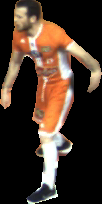

In [ ]:
import cv2
import numpy as np

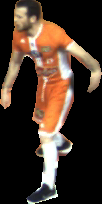

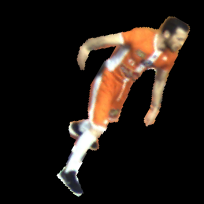

In [ ]:
img = playerB_4
cv2_imshow(img)

height = img.shape[0]
width = img.shape[1]
center = (width / 2, height / 2)
angle = 45

d30 = 30.0 * np.pi / 180    # 30도
d45 = 45.0 * np.pi / 180    # 45도
d90 = 90.0 * np.pi / 180    # 90도

# 동차 행렬을 이용한 기하 변환

M1 = np.array([[np.cos(d30), -1* np.sin(d30), 0], ## 30도 회전, 시계방향
               [np.sin(d30), np.cos(d30), 0],
               [0, 0, 1]], dtype=np.float32)


M2 = np.array([[1, 0, height], ## height 만큼이동
               [0, 1, width/3],   ## width의 1.3 만큼 이동
               [0, 0, 1]], dtype=np.float32)

M3 = np. array([[-1, 0, 0],
                   [0, 1, 0], ## x방향 flip
                  [0, 0, 1]], dtype=np.float32)

my_M = np.matmul( M2, M1) ## 회전(M1) 후 이동 (M2)
my_M = np.matmul(my_M, M3) ## 이동 후 x방향 flip

my_M = my_M[0:2, :]  ## 함수크기 맞추기
playerB_4Mod = cv2.warpAffine(img, my_M, (height, width*2))    ## 이미지, 계산된 행렬, 표기할 이미지 크기(가로 길이, 세로 길이)
cv2_imshow(playerB_4Mod)

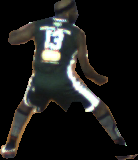

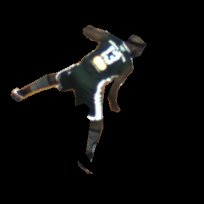

In [ ]:
d30 = 30.0 * np.pi / 180    # 30도
d45 = 45.0 * np.pi / 180    # 45도
d90 = 90.0 * np.pi / 180    # 90도

# 동차 행렬을 이용한 기하 변환

img2 = playerA_1
cv2_imshow(img2)

M1 = np.array([[np.cos(d45), -1* np.sin(d45), 0], ## 45도 회전, 시계방향
               [np.sin(d45), np.cos(d45), 0],
               [0, 0, 1]], dtype=np.float32)


M2 = np.array([[1, 0, width], ## width 만큼이동
               [0, 1, 0],
               [0, 0, 1]], dtype=np.float32)

M3 = np. array([[0.84, 0, 0],
                   [0, 0.84, 0],
                  [0, 0, 1]], dtype=np.float32)

my_M = np.matmul( M2, M1) ## 회전(M1) 후 이동 (M2)
my_M = np.matmul(my_M, M3) ## 이동 후 84%크기로 resize

my_M = my_M[0:2, :]  ## 함수크기 맞추기
playerA_1Mod = cv2.warpAffine(img2, my_M, (width*2, height))    ## 이미지, 계산된 행렬, 표기할 이미지 크기(가로 길이, 세로 길이)
cv2_imshow(playerA_1Mod)

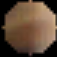

In [ ]:
d30 = 30.0 * np.pi / 180    # 30도
d45 = 45.0 * np.pi / 180    # 45도
d90 = 90.0 * np.pi / 180    # 90도

# 동차 행렬을 이용한 기하 변환

img3 = ball1

height = img3.shape[0]
width = img3.shape[1]
center = (width / 2, height / 2)
angle = 45

cv2_imshow(img3)

M1 = np.array([[np.cos(d90), -1* np.sin(d90), 0], ## 90도 회전, 시계방향
               [np.sin(d90), np.cos(d90), 0],
               [0, 0, 1]], dtype=np.float32)


M2 = np.array([[1, 0, width*3], ## width 만큼이동
               [0, 1, 0],
               [0, 0, 1]], dtype=np.float32)

M3 = np. array([[3, 0, 0],
                   [0, 3, 0],
                  [0, 0, 1]], dtype=np.float32)

my_M = np.matmul( M2, M1) ## 회전(M1) 후 이동 (M2)
my_M = np.matmul(my_M, M3) ## 이동 후 300%크기로 resize

my_M = my_M[0:2, :]  ## 함수크기 맞추기
ball1Mod = cv2.warpAffine(img3, my_M, (width*3, height*3))    ## 이미지, 계산된 행렬, 표기할 이미지 크기(가로 길이, 세로 길이)
cv2_imshow(ball1Mod)

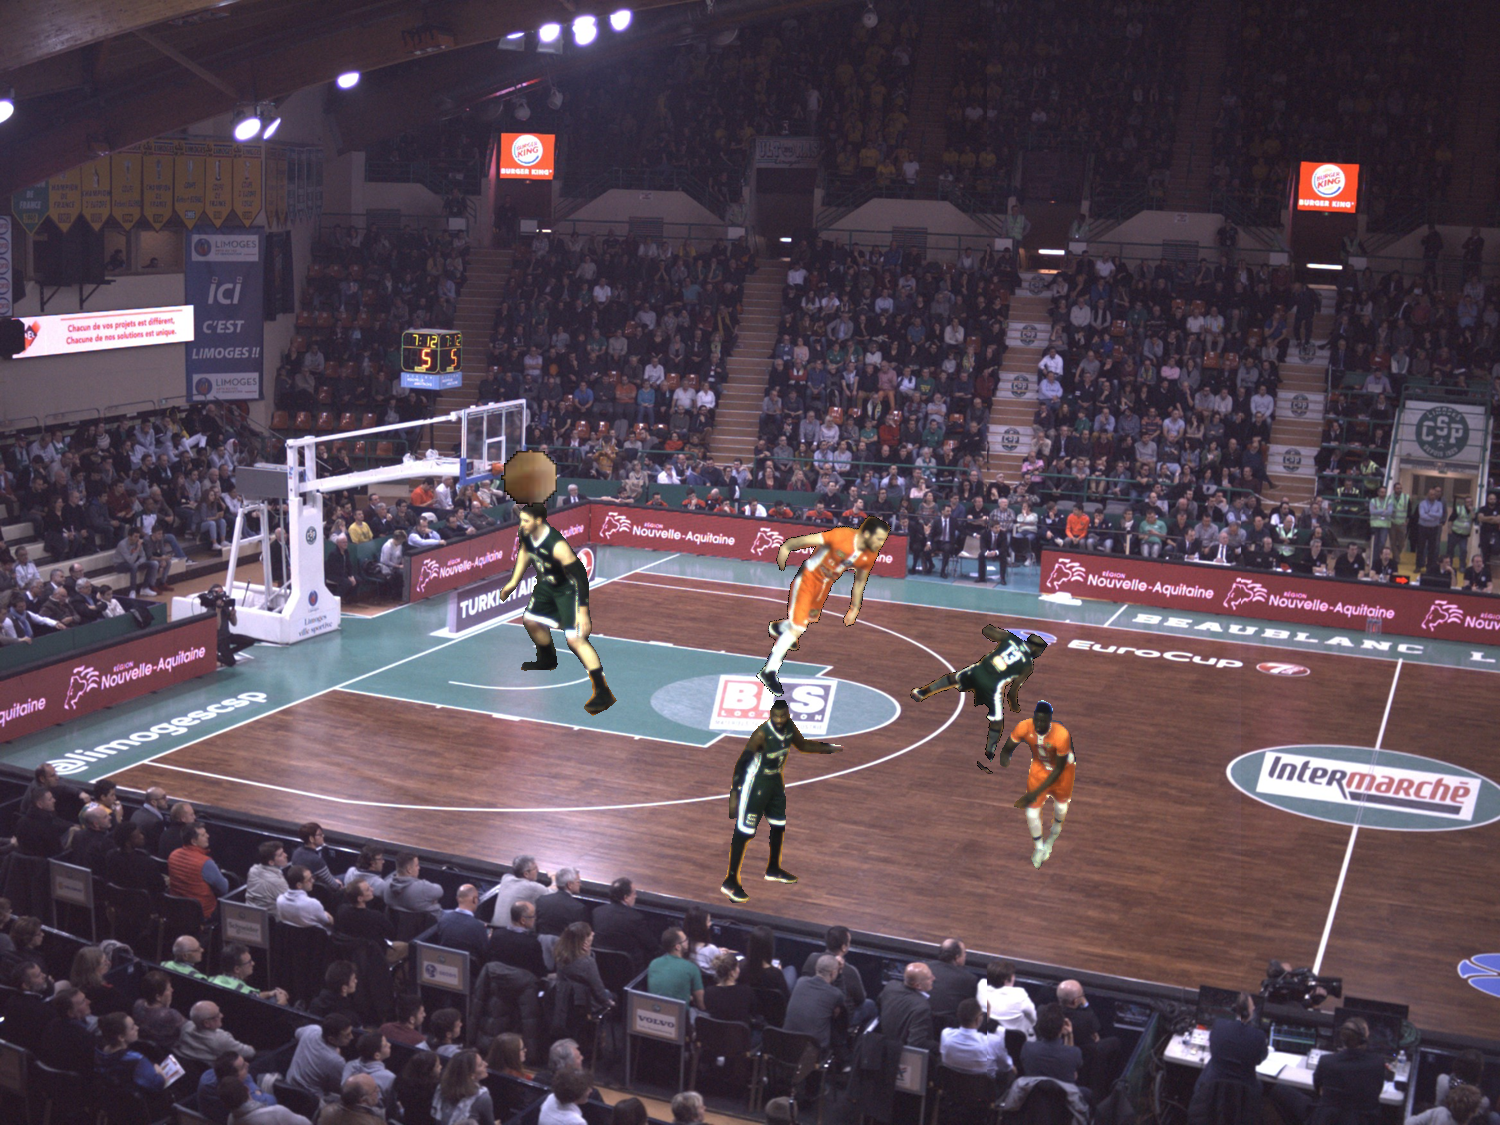

In [ ]:
testinsert = insert_img(court1, playerA_1Mod, 900, 600)
testinsert = insert_img(testinsert, playerA_2, 720, 700)
testinsert = insert_img(testinsert, playerA_3, 500, 500)

testinsert = insert_img(testinsert, playerB_1, 1000, 700)
testinsert = insert_img(testinsert, playerB_4Mod, 700, 500)
testinsert = insert_img(testinsert, ball1Mod, 500, 450)


cv2_imshow(testinsert)